In [43]:
import os
import sys
sys.path.append('../')

import numpy as np
import matplotlib
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from pprint import pprint
from scipy.optimize import curve_fit
from lmfit.models import ExponentialModel, PowerLawModel, ConstantModel

import src.io as sio
import src.preprocessing as spp
import src.fitting as sft
import ipympl

In [2]:
SECOND_PUMPDOWN = sio.get_folderpath("20201022_SecondPumpdown")

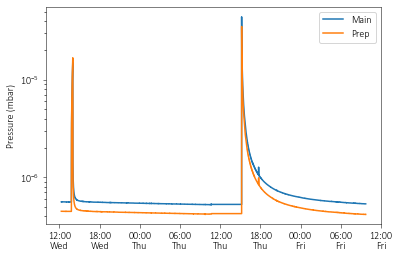

In [81]:
df1 = sio.read_tpg_data("pressure-monitoring01", SECOND_PUMPDOWN)
df2 = sio.read_tpg_data("pressure-monitoring02", SECOND_PUMPDOWN)

df = pd.concat([df1, df2])

mpl_times = sio.convert_tpg_to_mpl_time(df)

fig, ax = plt.subplots()

myFmt = DateFormatter("%H:%M\n%a")
ax.xaxis.set_major_formatter(myFmt)
ax.set_yscale("log")

ax.set_ylabel(r"Pressure (mbar)")

ax.plot(mpl_times, df["Main"], "-", label="Main")
ax.plot(mpl_times, df["Prep"], "-", label="Prep")
ax.legend()

#ax.set_xlim((0, 0.045))
#sio.savefig("pressure-monitoring01_02", SECOND_PUMPDOWN)

# Extrapolation

Several fits to the whole data were attempted using both Exponentional and PowerLaw models. These fits do not converge (both for scipy and lmfit).
We thus resort to just taking a linear fit from the endpoints of the data.

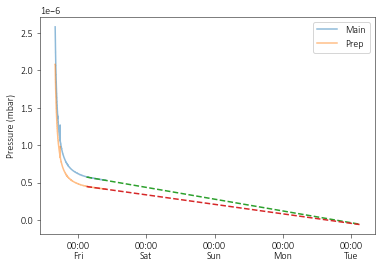

In [83]:
def linear_fit(x, a, b):
    return a + b * x

df = sio.read_tpg_data("pressure-monitoring02", SECOND_PUMPDOWN)

x = sio.convert_tpg_to_mpl_time(df)
y1 = df["Main"]
y2 = df["Prep"]

fig, ax = plt.subplots()

myFmt = DateFormatter("%H:%M\n%a")
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"Pressure (mbar)")

ax.plot(x, y1, "-", label="Main", alpha=0.5)
ax.plot(x, y2, "-", label="Prep", alpha=0.5)
ax.legend()

start = datetime.datetime.strptime("23-Oct-20 03:00", "%d-%b-%y %H:%M")
end = datetime.datetime.strptime("28-Oct-20 12:00", "%d-%b-%y %H:%M")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end - start).days)]
dt_series_mpl = matplotlib.dates.date2num(date_generated)

dfc = df[4000:]
popt, pcov = curve_fit(linear_fit, xdata=dfc["MPL_datetimes"], ydata=dfc["Main"])
ax.plot(dt_series_mpl, linear_fit(dt_series_mpl, *popt), "--", label="End extrapolation")

popt, pcov = curve_fit(linear_fit, xdata=dfc["MPL_datetimes"], ydata=dfc["Prep"])
ax.plot(dt_series_mpl, linear_fit(dt_series_mpl, *popt), "--", label="End extrapolation")

#sio.savefig("pressure-monitoring02", SECOND_PUMPDOWN)